## Welcome to the Matrix Row Reducing Calculator!
Performing row operations to get a matrix in rref can be a tedious process, especially when it comes to making computational mistakes. Now, most online calculators handle this problem, which is great, but they also handle the thinking required to come up with row operations, so you lose out on the fun!<br> This calculator is the best of both worlds, you get to enjoy coming up with the row operations, and the calculator handles all the computation!

**Run the cell below! Do this by selecting the cell and pressing `shift` + `enter` or by using the Run button in the toolbar at the top.** 


In [1]:
from sympy import *
from fractions import Fraction
init_printing()

**Tip: If you want to Run all cells in the notebook press the double triangle/play button in the toolbar at the top.**

### It's time to define our Matrix! We will be using SymPy's `Matrix()` object. 
1. First, we create a variable and set it equal to `Matrix([])`. <br>
`M = Matrix([])` <br>
2. Next, we populate the `([])` with the values of our matrix, making sure to enclose each row with `[]` and seperating everything with commas. <br>
`M = Matrix([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])` <br>
3. Lastly, we output our matrix by typing what we named our variable on the line below. <br>
`M = Matrix([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])` <br>
`M` <br>

#### You can get started in the cell below!

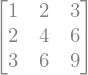

In [2]:
#Here's the code already written for you, just plug in your numbers/values and run the cell at the top
M = Matrix([[1, 2, 3], [2, 4, 6], [3, 6, 9]]) 
M

#### Getting an Error?
A `TypeError` could mean you are missing a comma or even have an extra comma after a row. <br>
A `SyntaxError` could mean you are missing a comma somewhere or a bracket. <br>

In [3]:
#This tells us the number of rows in our matrix
RowNum = shape(M)[0]
RowNum

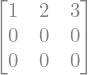

In [4]:
#Just need the rref of a matrix? check out this example below:
R = M.rref()[0]
R

### Ignore this and keep scrolling! This is just the source code ;)

In [5]:
#Elementary Row Operations
def rowSwap(M, i, j):
    ResultMatrix =  M.elementary_row_op(op='n<->m',row1=i-1, row2=j-1)
    return ResultMatrix
def rowMultiply(M, i , c):
    ResultMatrix = M.elementary_row_op(op='n->kn',row=i-1, k=c)
    return ResultMatrix
def rowAdd(M, i, c, j):
    ResultMatrix = M.elementary_row_op(op='n->n+km',row=i-1, k=c, row2=j-1)
    return ResultMatrix

#Functions to retrieve input from the user

def containsNumber(FractionInput):
    return any([char.isdigit() for char in FractionInput])

def UserInputFrac():
    cTemp = ''
        
    while containsNumber(cTemp) == False:
        try:
            cTemp = input("What are you multiplying by? ")
            c = Fraction(cTemp)
            break
        except ValueError:
            print("Try entering an integer next time... ", "\n")
            continue
    return c

def UserInputc():
    c = ''
        
    while c is not int:
        try:
            c = int(input("What are you multiplying by? "))
            break
        except ValueError:
            print("Try entering an integer next time... ", "\n")
            continue
    return c

def UserInputi1():
    i = ''
    
    while i is not int:
        try:
            i = int(input("What is the index of the first row? "))
            break
        except ValueError:
            print("Try entering an integer next time... ")
            continue
    return i
        

def UserInputj1():
    j = ''
        
    while j is not int:
        try:
            j = int(input("What is the index of the other row we're swapping with? " ))
            break
        except ValueError:
            print("Try entering an integer next time... ")
            continue
    return j

def UserInputi3():
    i = ''
        
    while i is not int:
        try:
            i = int(input("What row is getting added to/subtracted from? "))
            break
        except ValueError:
            print("Try entering an integer next time... ")
            continue
    return i

def UserInputj3(i):
    j = ''
    prompt = "Which row is being added to row " + str(i) + "? "
    
    while j is not int:
        try:
            #print ("Which row is being added to row ", i, "? ", sep="")
            j = int(input(prompt))
            break
        except ValueError:
            print("Try entering an integer next time... ")
            continue
    return j

def UserInputFrac3(j):
    cTemp = ''
    prompt = "What are you multiplying row " + str(j) + " by? "


    while containsNumber(cTemp) == False:
        try:
            cTemp = input(prompt)
            c = Fraction(cTemp)
            break
        except ValueError:
            print("Try entering an integer next time... ", "\n")
            continue
    
    return c

def UserInputc3(j):
    c = ''
    prompt = "What are you multiplying row " + str(j) + " by? "
        
    while c is not int:
        try:
            c = int(input(prompt))
            break
        except ValueError:
            print("Try entering an integer next time... ", "\n")
            continue
    return c


def InitialMessage():
    UserInput = ''
    prompt = "Which Row Operation would you like to perform? "

    while UserInput is not int:
        try:
            UserInput = int(input(prompt))
            break
        except ValueError:
            print("Please try again... ")
            continue
            
    return UserInput

#The Program itself
def DoRowOperations(M):
    
    print("Welcome to the Row Reducing Calculator!!", "\n")
    print("Lets get started on your matrix: ", "\n")
    pprint(M)
    
    while (M != R):

        UserInput = InitialMessage()
        print("\n")
        
        #Swap two rows
        if UserInput == 1:
            print("Let's interchange two rows! ")
            i = UserInputi1()
            while (i > RowNum) or (i < 1):
                print("Remember your matrix has", RowNum, "rows, please enter a valid index.")
                i = UserInputi1()
            j = UserInputj1()
            while (j > RowNum) or (j < 1) or (j == i):
                print("Remember your matrix has", RowNum, "rows, and you're swapping with row", i, "please enter a valid index.")
                j = UserInputj1()
            M = rowSwap(M, i, j)
            pprint(M)
            print('\n')

        #Multiply a row by a constant
        if UserInput == 2:
            print("Let's multiply a row by a constant! ")
            i = int(input("What row is being multiplied? "))
            while (i > RowNum) or (i < 1):
                print("Remember your matrix has", RowNum, "rows, please enter a valid index.")
                i = int(input("What row is being multiplied? "))
            c = UserInputFrac()
            M = rowMultiply(M, i, c)
            pprint(M)
            print('\n')
    
        #Add/Subtract a multiple of one row from another
        if UserInput == 3:
            print("Let's add a multiple of one row to another row!  ")
            i = UserInputi3()
            while (i > RowNum) or (i < 1):
                print("Remember your matrix has", RowNum, "rows, please enter a valid index.")
                i = UserInputi3()
            j = UserInputj3(i)
            while (j > RowNum) or (j < 1) or (j == i):
                print("Remember your matrix has", RowNum, "rows, and you're adding to row", i, "please enter a valid index.")
                j = UserInputj3(i)
            c = UserInputFrac3(j)
            M = rowAdd(M, i, c, j)
            pprint(M)
            print('\n')
        
        #Exit the loop for whatever reason
        if UserInput == 404:
            print("Thanks for using the calculator!")
            break
    print("You did it! Thanks for using the calculator!", "\n")
    return M

### Let's start doing Row Operations!
**All you need to do is run the cell below (`shift` + `enter`) and follow the prompts.**  <br>
**Before running the cell below make sure the name of your matrix you defined above is inside of the** `()` <br>
##### To Perform Row Operations:  <br>
Type `1` to **swap/interchange** rows <br>
Type `2` to **multiply** a row by a constant <br>
Type `3` to **add/subtract** a multiple of one row from another



Welcome to the Row Reducing Calculator!! 

Lets get started on your matrix:  

⎡1  2  3⎤
⎢       ⎥
⎢2  4  6⎥
⎢       ⎥
⎣3  6  9⎦
Which Row Operation would you like to perform? 3


Let's add a multiple of one row to another row!  
What row is getting added to/subtracted from? 2
Which row is being added to row 2? 1
What are you multiplying row 1 by? -2
⎡1  2  3⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣3  6  9⎦


Which Row Operation would you like to perform? 3


Let's add a multiple of one row to another row!  
What row is getting added to/subtracted from? 3
Which row is being added to row 3? 1
What are you multiplying row 1 by? -3
⎡1  2  3⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦


You did it! Thanks for using the calculator! 



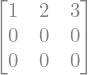

In [6]:
DoRowOperations(M)